In [41]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [42]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [44]:
train_images.shape

(60000, 28, 28)

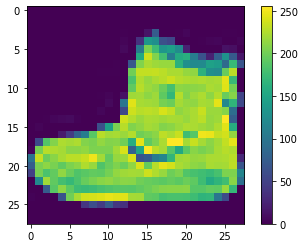

In [45]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [46]:
train_images = train_images / 255.0

test_images = test_images / 255.0

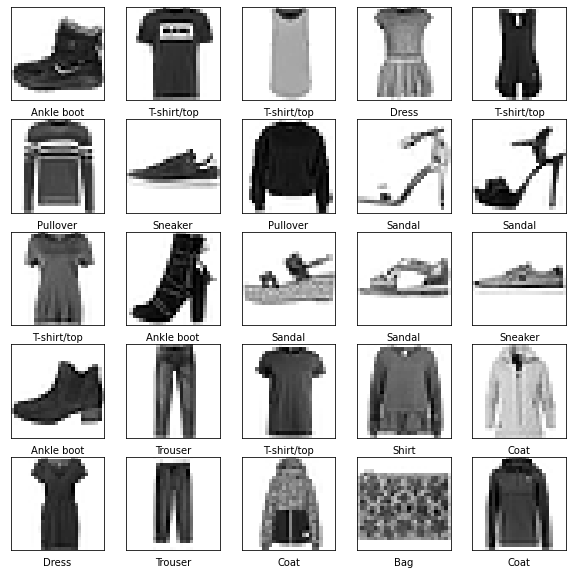

In [47]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [49]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5008 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3771 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3379 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3130 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2938 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2792 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2661 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2560 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2451 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.238

In [51]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3226 - accuracy: 0.8879

Test accuracy: 0.8878999948501587


In [52]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [53]:
predictions = probability_model.predict(test_images)

In [54]:
predictions[0]

array([7.6940341e-07, 5.6326654e-10, 8.4568459e-09, 3.1772265e-09,
       7.6269401e-07, 5.4329698e-04, 2.4724783e-05, 2.4808444e-02,
       5.5454077e-08, 9.7462195e-01], dtype=float32)

In [55]:
np.argmax(predictions[0])

9

In [56]:
test_labels[0]

9

In [57]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

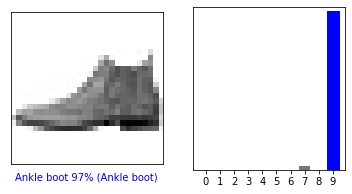

In [58]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

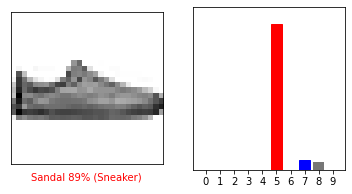

In [59]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

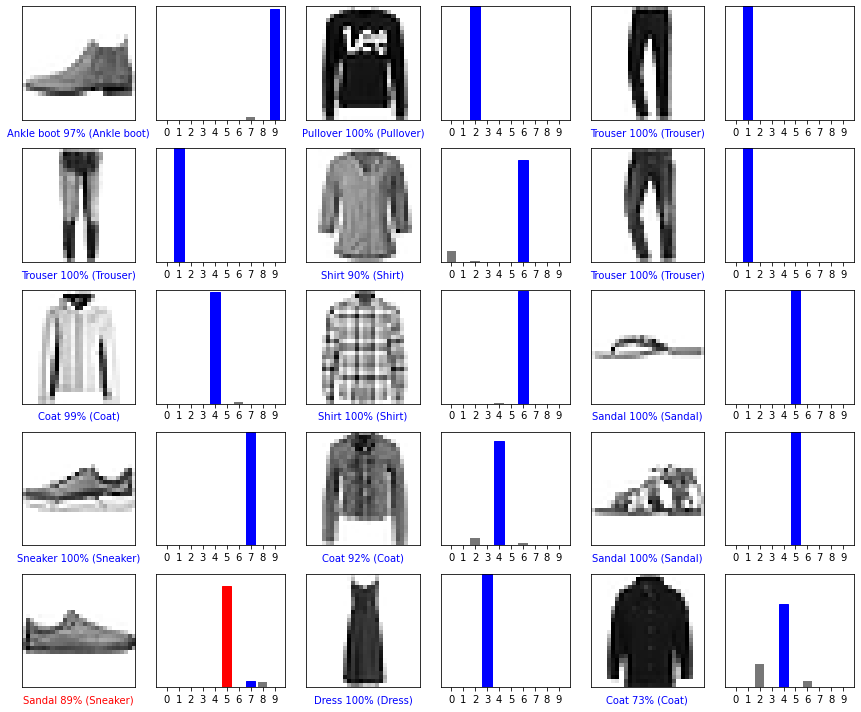

In [60]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()